# Deep Learning

Some of the improvements from `improved_network.ipynb` also allow us to explore deeper architectures (in particular, the ReLU activation function).
In this notebook, I implement a deep architecture that uses two hidden layers of 128 and 30 neurons each, and demonstrate that my ML library can facilitate deep learning.

With this deep architecture, I was able to obtain a test accuracy of __% on MNIST and __% on Fashion MNIST.

## Load MNIST Data

In [ ]:
from typing import *
import numpy as np
from matplotlib import pyplot as plt
from data_loader import load_data

In [ ]:
np.set_printoptions(suppress=True, precision=2)
np.random.seed(1)

In [ ]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("mnist")

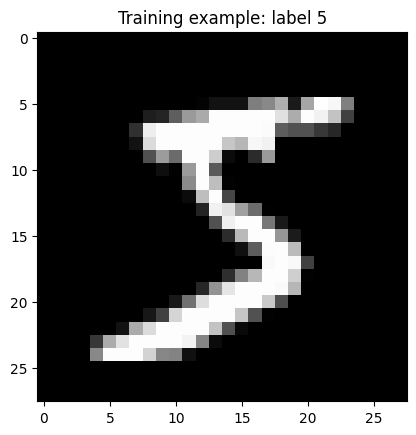

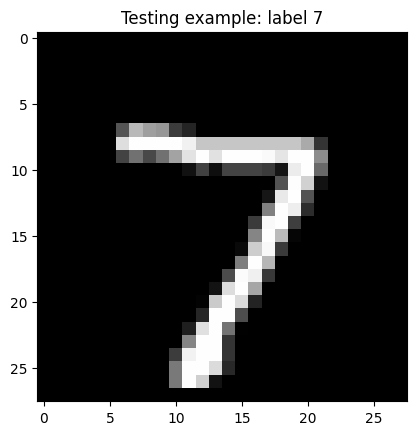

In [ ]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [ ]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Initialize the network

In [ ]:
from network import *
from layers import *
from loss import *

In [ ]:
layers = [
    Dense(784, 128, 0.1),
    LeakyReLU(128, 0.1),
    Dense(128, 32, 0.1),
    LeakyReLU(32, 0.1),
    Dense(32, 10, 0.1),
    LeakyReLU(10, 0.1),
    Softmax(10)
]

network = Network(
    layers,
    learning_rate=0.05,
    mini_batch_size=10
)

### Feed forward with random parameters

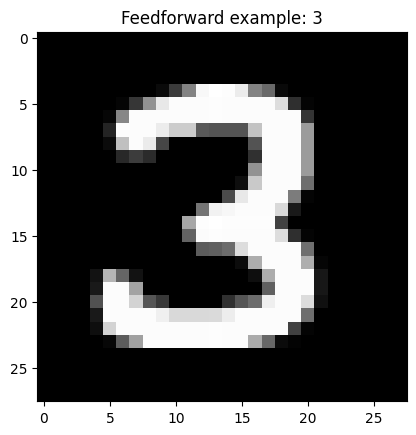

Network output: [0.55 0.04 0.04 0.04 0.04 0.04 0.12 0.04 0.04 0.04]


In [ ]:
# network.reset()
image, label = training_data[0]

plt.imshow(image.reshape((28, 28)), interpolation="nearest", cmap='gray')
plt.title("Feedforward example: " + str(np.argmax(label)))
plt.show()
network.set_training(False)
print("Network output:", network.forward(image))

As expected, the network outputs 10 random numbers from 0 to 1.

## Train the network on MNIST

In [ ]:
network.reset()
# Setting training to false speeds up forward passes, as the network does not
# have store information necessary for backpropagation.
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

# Training for more epochs will yield better results.
# This example is just meant to demonstrate the network is able to learn
# correctly.
network.train(
    epochs=30,
    training_data=training_data, 
    loss=NLL(),
    test_data=testing_data
)

Epoch 0: 1035 / 10000 (10.3%)
Epoch 1: 9436 / 10000 (94.4%)
Epoch 2: 9493 / 10000 (94.9%)
Epoch 3: 9574 / 10000 (95.7%)
Epoch 4: 9586 / 10000 (95.9%)
Epoch 5: 9594 / 10000 (95.9%)
Epoch 6: 9642 / 10000 (96.4%)
Epoch 7: 9627 / 10000 (96.3%)
Epoch 8: 9643 / 10000 (96.4%)
Epoch 9: 9664 / 10000 (96.6%)
Epoch 10: 9636 / 10000 (96.4%)
Epoch 11: 9606 / 10000 (96.1%)
Epoch 12: 9618 / 10000 (96.2%)
Epoch 13: 9660 / 10000 (96.6%)
Epoch 14: 9639 / 10000 (96.4%)
Epoch 15: 9653 / 10000 (96.5%)
Epoch 16: 9642 / 10000 (96.4%)
Epoch 17: 9623 / 10000 (96.2%)
Epoch 18: 9606 / 10000 (96.1%)


The improved network achieves a test accuracy of 96.5% on epoch 7.

The learning is somewhat inconsistent at the end, which could be fixed by lowering the learning rate. However, for the purposes of comparing the improved network with the basic network, I decided to keep it the same.

### Visualize weights

The weights are visualized below in a similar manner to the basic network.

Actually, I initially used the standard ReLU activation function, but around half the neurons would die since there is no gradient once a some logit goes negative.
This was easily visualized using the images below, as around half the images would just be random noise.
The LeakyReLU fixes this issue by introducing a small gradient below 0, contributing to around a 1% increase in test accuracy.

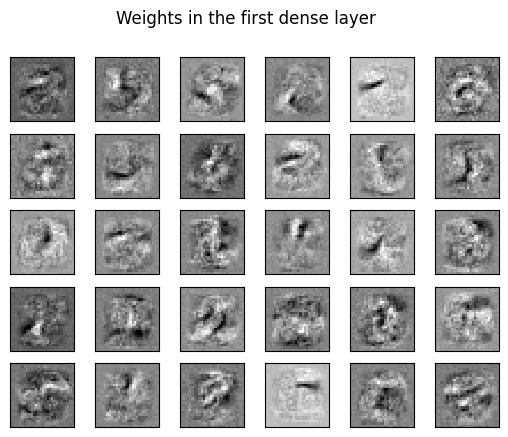

In [ ]:
fig, axes = plt.subplots(5, 6)
fig.suptitle("Weights in the first dense layer")
for i in range(30):
    ax = axes[i // 6, i % 6]
    im = network.layers[0].weights[i].reshape(28, 28)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

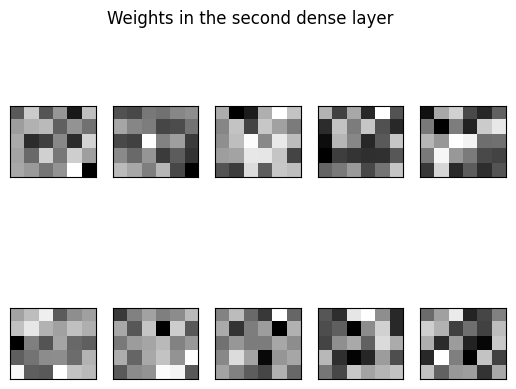

In [ ]:
fig, axes = plt.subplots(2, 5)
fig.suptitle("Weights in the second dense layer")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = network.layers[2].weights[i].reshape(5, 6)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

### Test the Network on My Handwriting

The following code tests the model's performance on my own handwriting.

In [ ]:
from matplotlib.image import imread

In [ ]:
images = []
for i in range(10):
    image = imread("my_handwriting/" + str(i) + ".jpg")
    # Convert image to grayscale
    image = (0.2989*image[:,:,0] + 0.5870*image[:,:,1] + 0.1140*image[:,:,2])
    image /= 256
    images.append(image)

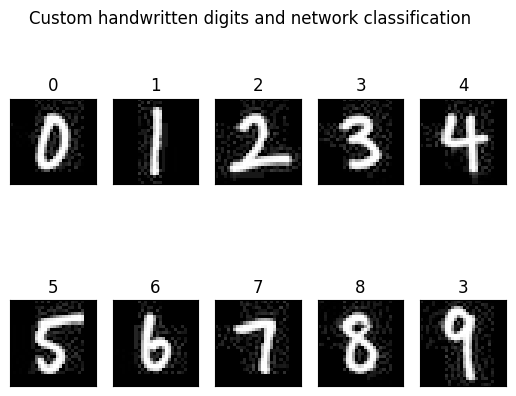

In [ ]:
network.set_training(False)

fig, axes = plt.subplots(2, 5)
fig.suptitle("Custom handwritten digits and network classification")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = images[i]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")
    ax.set_title(str(np.argmax(network.forward(im.flatten()))))

plt.show()

The network correctly classifies most of my handwritten digits. The extra noise in my images may have lowered the accuracy slightly.

## Load Fashion MNIST data

In [ ]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("fashion_mnist")

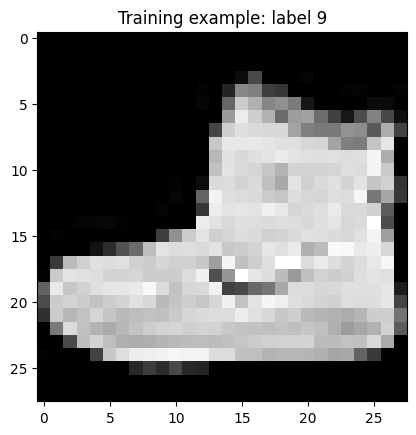

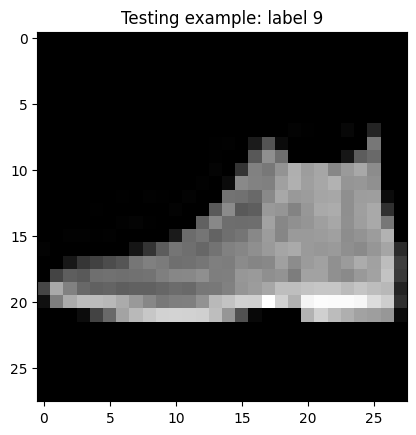

In [ ]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [ ]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Train the network on Fashion MNIST

In [ ]:
network.reset()
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

# Training for more epochs will yield better results.
# This example is just meant to demonstrate the network is able to learn
# correctly.
network.train(
    epochs=30,
    training_data=training_data, 
    loss=MSE(),
    test_data=testing_data
)

Epoch 0: 1008 / 10000 (10.1%)
Epoch 1: 8351 / 10000 (83.5%)
Epoch 2: 8463 / 10000 (84.6%)
Epoch 3: 8466 / 10000 (84.7%)
Epoch 4: 8509 / 10000 (85.1%)
Epoch 5: 8497 / 10000 (85.0%)
Epoch 6: 8410 / 10000 (84.1%)
Epoch 7: 8327 / 10000 (83.3%)


KeyboardInterrupt: 

The improved network achieves a test accuracy of __% on epoch _.

### Visualize weights

The weights are visualized similar to the MNIST example. Again, we can see the network has learned some interesting visual features.

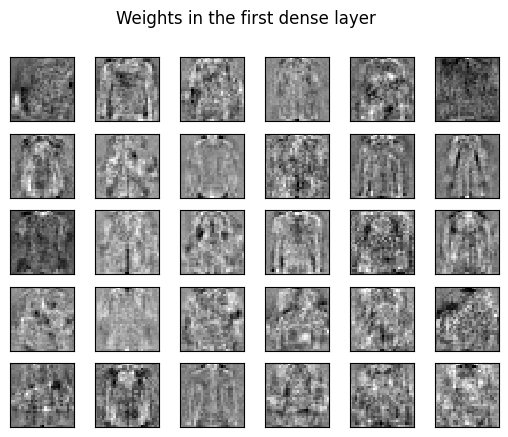

In [ ]:
fig, axes = plt.subplots(5, 6)
fig.suptitle("Weights in the first dense layer")
for i in range(30):
    ax = axes[i // 6, i % 6]
    im = network.layers[0].weights[i].reshape(28, 28)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

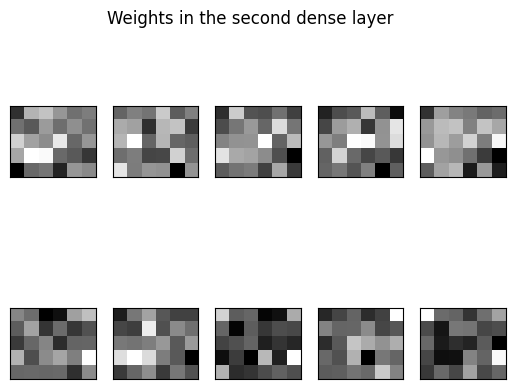

In [ ]:
fig, axes = plt.subplots(2, 5)
fig.suptitle("Weights in the second dense layer")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = network.layers[2].weights[i].reshape(5, 6)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")